-------------
# Cyberbullying and Hate-speech Tweets Classification


--------


![Social Media Cyberbullying](https://kidshelpline.com.au/sites/default/files/bdl_image/Teen%20girl%20being%20cyberbullied_3.png)


## Introduction
Cyberbullying and cyberaggression are increasingly worrisome phenomena affecting people across all demographics. More than half of young social media users worldwide have been exposed to such prolonged and/or coordinated digital harassment. Victims can experience a wide range of emotions, with negative consequences such as embarrassment, depression, isolation from other community members, which embed the risk to lead to even more critical consequences, such as suicide attempts.

----

Cyberbullying was not taken seriously in the early Web era: the typical advice was to “just turn off the screen” or “disconnect” your device. However, as Web’s proliferation and the extent of its consequences reached epidemic levels, such behavior can no longer be ignored; in 2017, based on a survey conducted from the Pew Research Center, `41%` of Americans have been personally subjected to harassing behavior online, while `66%` have witnessed these behaviors directed at others. Furthermore, about `50%` of young social media users reported being bullied online in various forms. Overall, `27%` of students report being cyberbullied at some point in their lifetimes. Even more worrisome is that `15%` of high school students of in grades 9 to 12, and `9%` of students in grades 6 to 12, have experienced cyberbullying.

---
This project is aimed to contribute in reducing the phenomena of cyberbullying somehow. This project is propsed as final project for T5 Data Science Bootcamp presented by SDAIA.

Let's get started...

## Reading Data and Exploring Data

For the data we have used an avaiable dataset on kaggle.com.

### 1. Import required libraries

In [1]:
## All purpose library
import pandas as pd
import numpy as np

## Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## ML Library
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
import pickle



## NLP library
import re
import string
import nltk
from nltk.corpus import stopwords

## Ignoring Warning during trainings 
import warnings
warnings.filterwarnings('ignore')

### 2. Read corpus

In [2]:
## using pandas read_csv funtion to load csv files
tweets = pd.read_csv('~/Downloads/labeled_data.csv')

## Displying the dataframe
print('A look at tweets corpus: ')
display(tweets.head())

A look at tweets corpus: 


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### 3. Explore corpus

In [3]:
## Shape of Dataset
print("Tweets Dataset shape:\n",tweets.shape,"\n") ## (24783 rows, 7 Columns)

Tweets Dataset shape:
 (24783, 7) 



In [4]:
# Get some information about the dataset, columns types, entries etc..
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


#### Let's elaborate more about Columns 
Here is what the columns represent:
* unnamed: is index 
* count: number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were 
* hate_speech: number of CF users who judged the tweet to be hate speech
* offensive_language: number of CF users who judged the tweet to be offensive
* neither: number of CF users who judged the tweet to be neither offensive nor non-offensive
* class: class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither
* tweet: text tweet

In [5]:
# A brief description of the dataset
tweets.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [6]:
# using isnull to give us boolean data and suming all true will give exact number of missing values.
print("Tweets Dataset missing data:\n",tweets.isnull().sum(),"\n")

Tweets Dataset missing data:
 Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64 



👆 It can be seen that the dataset has no null values, which is quite amazing so we won't have to fill any.

In [7]:
# check how many CF participated in annotating tweets
tweets['count'].value_counts()

3    22807
6     1571
4      211
9      167
7       27
Name: count, dtype: int64

### 4. Visulaize data

,class
1,19190
2,4163
0,1430


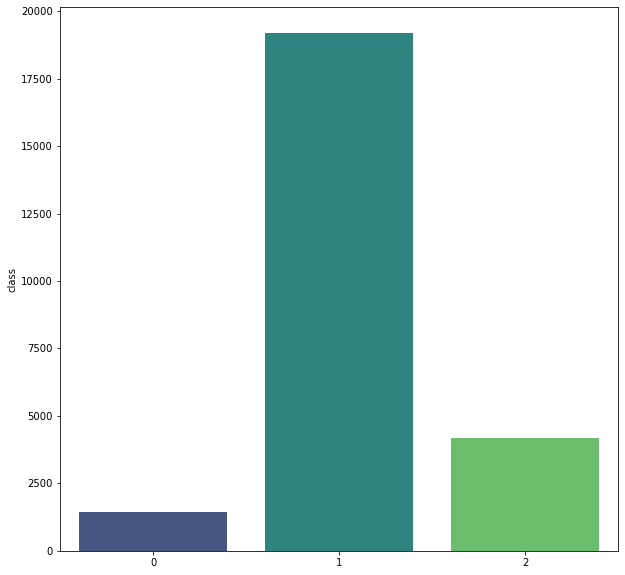

In [8]:
## using pandas value_counts() on target will give us number of 0's which is hate-speech tweets,
## and 1's which is offensive tweets.
## and 2's which is neither
VCtweets=tweets['class'].value_counts().to_frame()

## seaborn barplot to display barchart
## plt figure adjusting size
plt.figure(figsize=(10,10))
sns.barplot(data=VCtweets,x=VCtweets.index,y="class",palette="viridis");
VCtweets


# 0 represnts hate speech tweets
# 1 represnts offensive tweets
# 2 represnts normal tweets 

Note that we have around `19190` tweets that is annotated as offensive tweets. But we can combine 0 and 1 bars to be one class 0

In [9]:
#drop columns 
tweets = tweets.drop(columns=['count', 'hate_speech', 'offensive_language', 'neither'], axis=1)

#change columns names
tweets.rename(columns ={'class':'label', 'tweet':'text'}, inplace = True)

#see value counts
tweets['label'].value_counts()

1    19190
2     4163
0     1430
Name: label, dtype: int64

In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24783 non-null  int64 
 1   label       24783 non-null  int64 
 2   text        24783 non-null  object
dtypes: int64(2), object(1)
memory usage: 581.0+ KB


In [11]:
#Replace 0,1 which were offenisve=1 and hate=0 to one class 0
#and normal tweets are class 1

tweets = tweets.replace({'label': {1: 0, 2: 1}})
tweets['label'].value_counts()

0    20620
1     4163
Name: label, dtype: int64

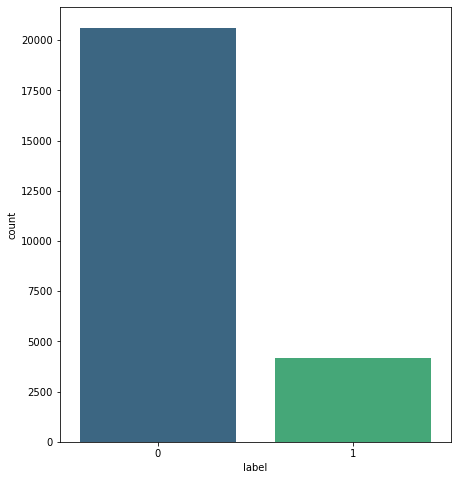

In [12]:
#now plot the data
plt.figure(figsize=(7,8))
sns.countplot('label',data=tweets, palette='viridis');

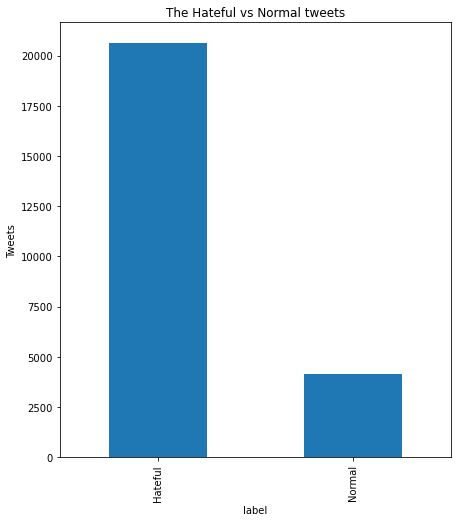

In [13]:
#plot data in more appealing form
plt.figure(figsize=(7,8))
tweets['label'].value_counts().plot(kind='bar')
plt.title('The Hateful vs Normal tweets')
plt.xlabel('label')
plt.xticks([0, 1],['Hateful', 'Normal'])
plt.ylabel('Tweets');

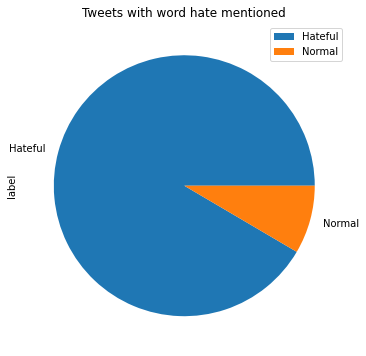

In [14]:
tweets[tweets.text.str.contains('hate')].label.\
value_counts().to_frame().rename(index={1:'Normal',0:'Hateful'}).\
plot.pie(y='label', figsize=(12,6), title='Tweets with word hate mentioned');   

        

### 5. Going Deep into Offensive Tweets

In [15]:
## show a sample of the corpus
display("Random sample of offensive tweets:",tweets[tweets['label']==0].text.sample(3).to_frame())

'Random sample of offensive tweets:'

,text
21176,Stop lettin them messy hoes mess with your bus...
24127,just made TMobile my bitch
16416,RT @MeechIsDEAD: I Cant Wait Till U &amp; Ya B...


In [16]:
## To get the full text just use the output indcies from previous output
print(tweets.text[21176] + '\n' + tweets.text[24127] + '\n' + tweets.text[16416])

Stop lettin them messy hoes mess with your business.
just made TMobile my bitch
RT @MeechIsDEAD: I Cant Wait Till U &amp; Ya Boyfriend Break Up, That nigga act Like he own the pussy


### 6. Text Cleaning

In [17]:
# lowering the text
tweets.text = tweets.text.apply(lambda x:x.lower() )

#removing square brackets
tweets.text = tweets.text.apply(lambda x:re.sub('\[.*?\]', '', x) )
tweets.text = tweets.text.apply(lambda x:re.sub('<.*?>+', '', x) )

#removing hyperlink
tweets.text = tweets.text.apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x) )

#removing puncuation
tweets.text = tweets.text.apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )
tweets.text = tweets.text.apply(lambda x:re.sub('\n' , '', x) )

#removing words containing numbers
tweets.text = tweets.text.apply(lambda x:re.sub('\w*\d\w*' , '', x) )

#removing rt
tweets.text = tweets.text.apply(lambda x:re.sub('rt' , '', x) )

tweets.text.head()

0      mayasolovely as a woman you shouldnt complai...
1       boy dats coldtyga dwn bad for cuffin dat ho...
2      urkindofbrand dawg   you ever fuck a bitch a...
3          cganderson vivabased she look like a tranny
4      shenikarobes the shit you hear about me migh...
Name: text, dtype: object

### 7. Word Cloud of Tweets

In [18]:
#assinging each class to pd series
hate_tweets = tweets[tweets['label']==0]['text']
normal_tweets = tweets[tweets['label']==1]['text']

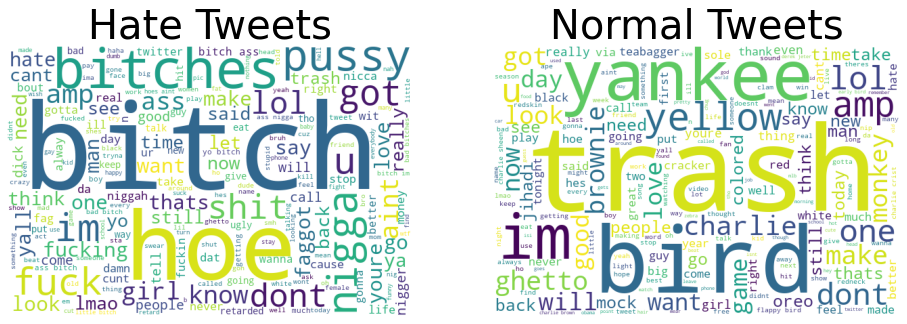

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 8])
## on the left, wordcloud will generate a wordcloud of the most common words in hate_tweets 
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(hate_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Hate Tweets',fontsize=40);


## on the right, wordcloud will generate a wordcloud of the most common words in neither 
wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(normal_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Normal Tweets',fontsize=40);

## Prepare Data for Modeling

In order to input data to the model, we need to prepare the dataset
* Splitting
* Tokenization
* Vectorization

In [20]:
## before we go into it let's have another look at our dataframe tweets
tweets.head(10)

,Unnamed: 0,label,text
0,0,1,mayasolovely as a woman you shouldnt complai...
1,1,0,boy dats coldtyga dwn bad for cuffin dat ho...
2,2,0,urkindofbrand dawg you ever fuck a bitch a...
3,3,0,cganderson vivabased she look like a tranny
4,4,0,shenikarobes the shit you hear about me migh...
5,5,0,tmadisonx the shit just blows meclaim you so f...
6,6,0,brighterdays i can not just sit up and hate on...
7,7,0,cause im tired of you big bitches coming for ...
8,8,0,amp you might not get ya bitch back amp thats...
9,9,0,rhythmixx hobbies include fighting mariambitch


### 1. Splitting data into train and test set

In [21]:
#Split data

x = tweets['text']
y = tweets['label']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

18587 18587
6196 6196


In [23]:
x_train.shape, x_test.shape

((18587,), (6196,))

### 2. Tokenization

Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph.

In [24]:
#Tokenizer
token = nltk.tokenize.RegexpTokenizer(r'\w+')
#applying token
tweets.text = tweets.text.apply(lambda x:token.tokenize(x))
#view
display(tweets.text.head())

0    [mayasolovely, as, a, woman, you, shouldnt, co...
1    [boy, dats, coldtyga, dwn, bad, for, cuffin, d...
2    [urkindofbrand, dawg, you, ever, fuck, a, bitc...
3    [cganderson, vivabased, she, look, like, a, tr...
4    [shenikarobes, the, shit, you, hear, about, me...
Name: text, dtype: object

### 3. Vectorization

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, we need a way to convert each document into a numeric vector.

In this case Countvectorizer is best performing.

In [25]:
count_vectorizer = CountVectorizer()
train_vectors_count = count_vectorizer.fit_transform(x_train)
test_vectors_count = count_vectorizer.transform(x_test)


In [26]:
count = CountVectorizer(stop_words='english', ngram_range=(1,5))

x_train_vectorizer = count.fit_transform(x_train)
x_test_vectorizer = count.transform(x_test)

x_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
count.vocabulary_

{'lynchiewcvb': 204301,
 'big': 24964,
 'night': 231778,
 'wcvb': 341273,
 'maha': 205361,
 'coakleycharlie': 63420,
 'baker': 19187,
 'debate': 78475,
 'bruinsminnesota': 49507,
 'wild': 346284,
 'world': 350718,
 'series': 278409,
 'game': 118134,
 'lynchiewcvb big': 204302,
 'big night': 25287,
 'night wcvb': 232023,
 'wcvb maha': 341274,
 'maha coakleycharlie': 205362,
 'coakleycharlie baker': 63421,
 'baker debate': 19197,
 'debate bruinsminnesota': 78476,
 'bruinsminnesota wild': 49508,
 'wild world': 346325,
 'world series': 350867,
 'series game': 278413,
 'lynchiewcvb big night': 204303,
 'big night wcvb': 25291,
 'night wcvb maha': 232024,
 'wcvb maha coakleycharlie': 341275,
 'maha coakleycharlie baker': 205363,
 'coakleycharlie baker debate': 63422,
 'baker debate bruinsminnesota': 19198,
 'debate bruinsminnesota wild': 78477,
 'bruinsminnesota wild world': 49509,
 'wild world series': 346326,
 'world series game': 350868,
 'lynchiewcvb big night wcvb': 204304,
 'big night 

## Modeling and Predicting

##### 1. Using Logistic Regression to train model

###### `on vectorized X, y train`

In [42]:
log_modelV = LogisticRegression().fit(x_train_vectorizer, y_train)

prediction_log_V = log_modelV.predict(x_test_vectorizer)

print('The traning score: ', log_modelV.score(x_train_vectorizer, y_train))

#see prediction
print('\n')
print(confusion_matrix(y_test, prediction_log_V))
print (classification_report(y_test, prediction_log_V))

The traning score:  0.9983859686877925


[[5016  139]
 [ 228  813]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5155
           1       0.85      0.78      0.82      1041

    accuracy                           0.94      6196
   macro avg       0.91      0.88      0.89      6196
weighted avg       0.94      0.94      0.94      6196



##### 2. Using Simple Naive Bayes

In [44]:
model_vectorizer = MultinomialNB().fit(x_train_vectorizer, y_train)

prediction_vectorizer = model_vectorizer.predict(x_test_vectorizer)

print('The traning score: ', model_vectorizer.score(x_train_vectorizer, y_train))

#see predictions
print('\n')
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

The traning score:  0.9960725238069619


[[5135   20]
 [ 690  351]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5155
           1       0.95      0.34      0.50      1041

    accuracy                           0.89      6196
   macro avg       0.91      0.67      0.72      6196
weighted avg       0.89      0.89      0.86      6196



#### How about a third one? Let's see Random forest

##### 3. Using Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(random_state = 100)
model_RF.fit(x_train_vectorizer, y_train)

prediction_RF = model_RF.predict(x_test_vectorizer)
print('The traning score: ', model_RF.score(x_train_vectorizer, y_train))


print('\n')
print(confusion_matrix(y_test,prediction_RF))
print (classification_report(y_test, prediction_RF))

The traning score:  0.9996771937375585


[[4998  157]
 [ 277  764]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5155
           1       0.83      0.73      0.78      1041

    accuracy                           0.93      6196
   macro avg       0.89      0.85      0.87      6196
weighted avg       0.93      0.93      0.93      6196



## That would the end of it
## Thank you